In [1]:
!pip install banditsbook

  Using cached banditsbook-0.1.1-py3-none-any.whl.metadata (1.9 kB)
Using cached banditsbook-0.1.1-py3-none-any.whl (14 kB)


In [3]:
from arms.bernoulli import BernoulliArm

# two imagenary ads with probability of clicking from the users
arm0 = BernoulliArm(0.05)
arm1 = BernoulliArm(0.4)
arms = [arm0, arm1]

In [43]:
# simulation for 5 times
[arm1.draw() for _ in range(5)]

[0.0, 0.0, 0.0, 1.0, 0.0]

# Running the Experiment w/ a Random Algorith

In [53]:
import pandas as pd
from algorithms.epsilon_greedy.standard import EpsilonGreedy
from testing_framework.tests import test_algorithm

e = 1
sims = 1000
horizon = 250 # length of single experiment

df = pd.DataFrame()
algo1 = EpsilonGreedy(e,[],[])
sim_nums, times, chosen_arms, rewards, cumulative_rewards = test_algorithm(
    algo1, arms, sims, horizon
)
arrays = [[e] * sims * horizon, sim_nums, times]
arrays.__len__()

3

In [54]:
index = pd.MultiIndex.from_arrays(
    arrays, names=('epsilon', 'simulation', 'time')
)

In [55]:
df_chosen_arm = pd.DataFrame(chosen_arms, index)
df_chosen_arm

0
epsilon simulation time   
1       1          1     0
                   2     1
                   3     1
                   4     0
                   5     0
...                     ..
        1000       246   0
                   247   1
                   248   0
                   249   1
                   250   0

[250000 rows x 1 columns]

In [56]:
df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / sims
df_chosen_arm

0
epsilon time       
1       1     0.492
        2     0.516
        3     0.510
        4     0.500
        5     0.500
...             ...
        246   0.490
        247   0.495
        248   0.476
        249   0.513
        250   0.501

[250 rows x 1 columns]

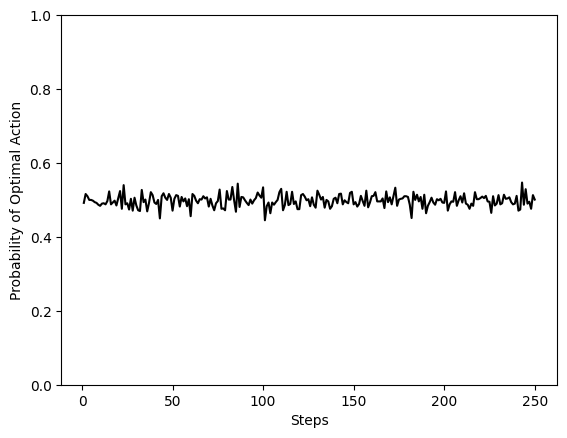

In [63]:
import matplotlib

df_chosen_arm.loc[1].plot(legend=None,ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps",color="k");

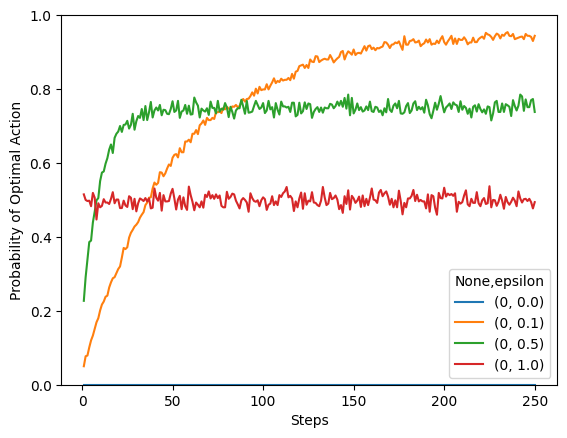

In [69]:
df = pd.DataFrame()
for epsilon in [0, 0.1, 0.5, 1]:
    algo1 = EpsilonGreedy(epsilon, [], [])
    sim_nums, times, chosen_arms, rewards, cumulative_rewards = test_algorithm(
        algo1, arms, sims, horizon)

    arrays = [[epsilon] * sims * horizon, sim_nums, times]
    index = pd.MultiIndex.from_arrays(
        arrays, names=('epsilon', 'simulation', 'time'))
    df_chosen_arm = pd.DataFrame(chosen_arms, index=index)
    df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / sims
    df = pd.concat([df, df_chosen_arm])

df.unstack(level=0).plot(ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps");
